Kích thước tập dữ liệu: (44898, 5)
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  
3  December 30, 2017       1  
4  December 29, 2017       1  

Số lượng mẫu theo nh

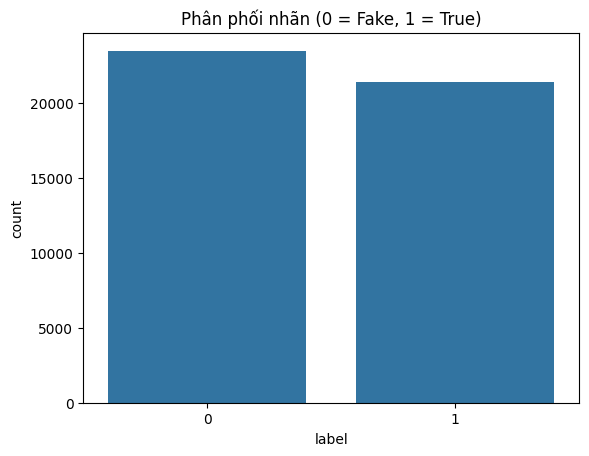


--- Kết quả với BoW ---
Logistic Regression Accuracy: 0.9971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Naive Bayes Accuracy: 0.9539
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      4696
           1       0.94      0.97      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

SVM Accuracy: 0.9964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg    

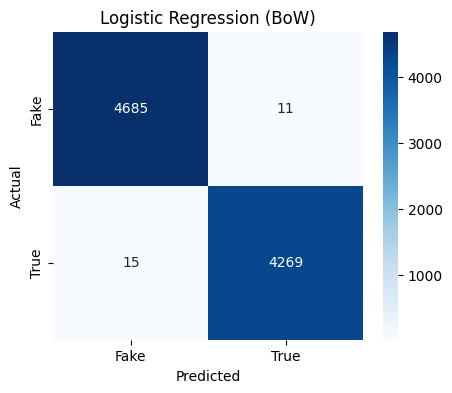


Naive Bayes Accuracy: 0.9539


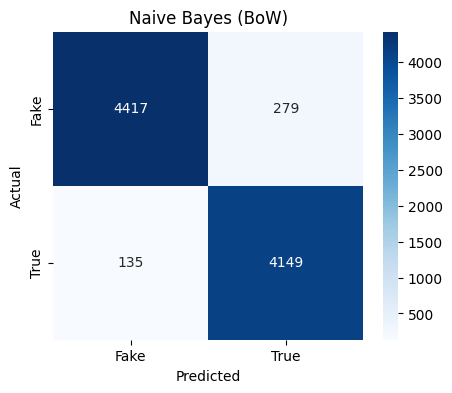


SVM Accuracy: 0.9964


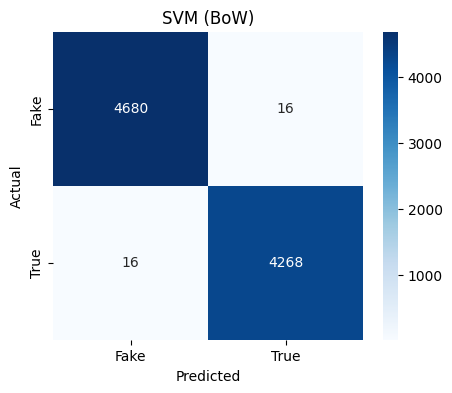


--- Confusion Matrix với TF-IDF ---

Logistic Regression Accuracy: 0.9889


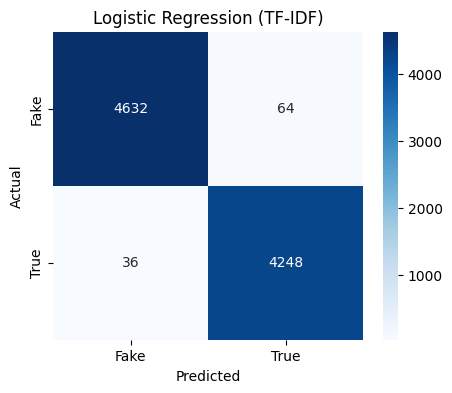


Naive Bayes Accuracy: 0.9406


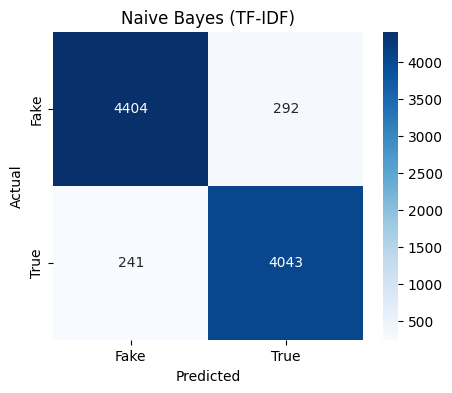


SVM Accuracy: 0.9955


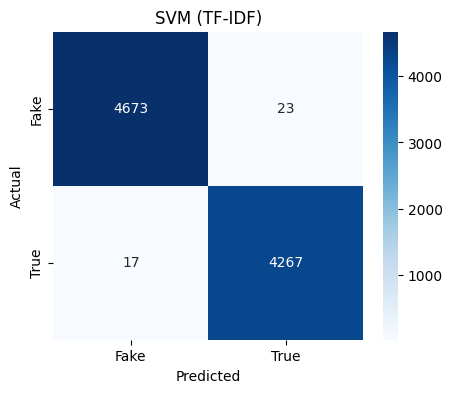


=== TỔNG KẾT ===
Mô hình tốt nhất: Logistic Regression + BoW → Accuracy = 0.9971046770601336


In [ ]:
# fake_news_detection.py
# Đề tài: Phát hiện tin tức giả mạo (Fake News Detection)

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# =============================
# BƯỚC 1: KHÁM PHÁ DỮ LIỆU
# =============================

# Đọc dữ liệu CSV an toàn, bỏ qua dòng lỗi
true_df = pd.read_csv(
    "True.csv",
    encoding="utf-8",
    on_bad_lines='skip',
    quoting=csv.QUOTE_MINIMAL
)

fake_df = pd.read_csv(
    "Fake.csv",
    encoding="utf-8",
    on_bad_lines='skip',
    quoting=csv.QUOTE_MINIMAL
)

# Gắn nhãn
true_df["label"] = 1   # 1 = True news
fake_df["label"] = 0   # 0 = Fake news

# Gộp dữ liệu
df = pd.concat([true_df, fake_df], axis=0).reset_index(drop=True)

print("Kích thước tập dữ liệu:", df.shape)
print(df.head())

# Thống kê số lượng mẫu mỗi nhãn
print("\nSố lượng mẫu theo nhãn:")
print(df["label"].value_counts())

# Độ dài văn bản trung bình
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))
print("\nĐộ dài trung bình của văn bản:", df["text_length"].mean())

# Trực quan hóa phân phối nhãn
sns.countplot(x="label", data=df)
plt.title("Phân phối nhãn (0 = Fake, 1 = True)")
plt.show()

# =============================
# BƯỚC 2 + 3: TIỀN XỬ LÝ VĂN BẢN
# =============================

def clean_text(text):
    text = str(text).lower()                         # chữ thường
    text = re.sub(r"[^a-zA-Z\s]", "", text)          # bỏ số, ký tự đặc biệt
    text = re.sub(r"\s+", " ", text).strip()         # bỏ khoảng trắng thừa
    return text

df["clean_text"] = df["text"].apply(clean_text)

# =============================
# BƯỚC 4: VECTOR HÓA VĂN BẢN
# =============================

# BoW
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df["clean_text"])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["clean_text"])

y = df["label"]

# =============================
# BƯỚC 5: CHIA DỮ LIỆU
# =============================
X_train_bow, X_test_bow, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tfidf, X_test_tfidf, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

# =============================
# BƯỚC 6: HUẤN LUYỆN MÔ HÌNH
# =============================

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM": LinearSVC()
}

results = {}

print("\n--- Kết quả với BoW ---")
for name, model in models.items():
    model.fit(X_train_bow, y_train)
    y_pred = model.predict(X_test_bow)
    acc = accuracy_score(y_test, y_pred)
    results[f"{name} + BoW"] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

print("\n--- Kết quả với TF-IDF ---")
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    results[f"{name} + TF-IDF"] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# =============================
# BƯỚC 7: ĐÁNH GIÁ MÔ HÌNH (Confusion Matrix)
# =============================

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

print("\n--- Confusion Matrix với BoW ---")
for name, model in models.items():
    model.fit(X_train_bow, y_train)
    y_pred = model.predict(X_test_bow)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    plot_confusion(y_test, y_pred, f"{name} (BoW)")

print("\n--- Confusion Matrix với TF-IDF ---")
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    plot_confusion(y_test, y_pred, f"{name} (TF-IDF)")

# =============================
# BƯỚC 8: KẾT LUẬN
# =============================
print("\n=== TỔNG KẾT ===")
best_model = max(results, key=results.get)
print("Mô hình tốt nhất:", best_model, "→ Accuracy =", results[best_model])
